In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata,  on="Mouse ID", how="left")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].nunique()
mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = combined_data.loc[(combined_data["Mouse ID"] == "g989")]
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_mice = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ID) ==False]
drop_duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = drop_duplicate_mice["Mouse ID"].nunique()
total_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = drop_duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = drop_duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_variance =  drop_duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_std = drop_duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem = drop_duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean, 
                             "Median Tumor Volume": drug_median, 
                             "Tumor Volume Variance": drug_variance, 
                             "Tumor Volume Std. Dev.": drug_std, 
                             "Tumor Volume Std. Err.": drug_sem})
drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_data = drop_duplicate_mice.groupby("Drug Regimen")
aggregate_table = aggregate_data.agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})

aggregate_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

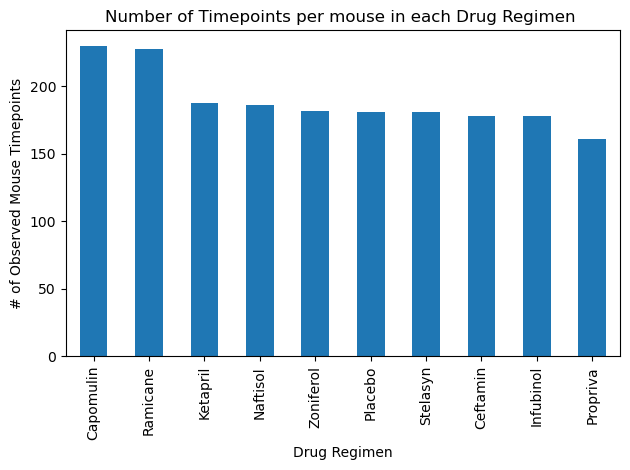

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create series for  y-axis
drugs = combined_data.groupby(["Drug Regimen"]).count() ["Mouse ID"]

# Set values into descending order
drugs = drugs.sort_values(ascending=False)

#Set up bar chart
drugs = drugs.plot(kind="bar")


#Create labels, rotate x-axis labels
drugs.set_title("Number of Timepoints per mouse in each Drug Regimen ")
drugs.set_xlabel("Drug Regimen")
drugs.set_ylabel("# of Observed Mouse Timepoints")


#plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

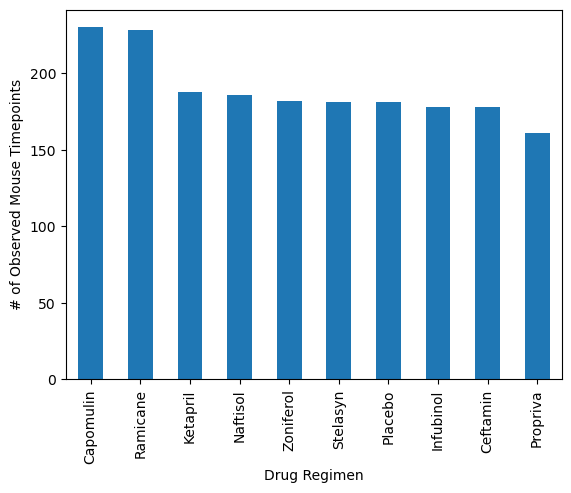

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot

counts = combined_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


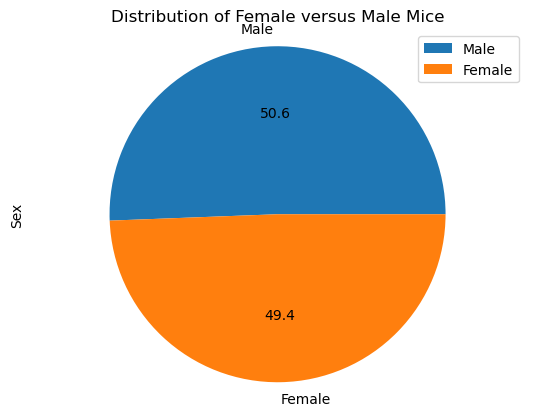

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = pd.DataFrame(drop_duplicate_mice["Sex"].value_counts())
mice_gender.plot(kind="pie", y="Sex", title=("Distribution of Female versus Male Mice"), autopct="%1.1f")
plt.axis("equal")

plt.show()



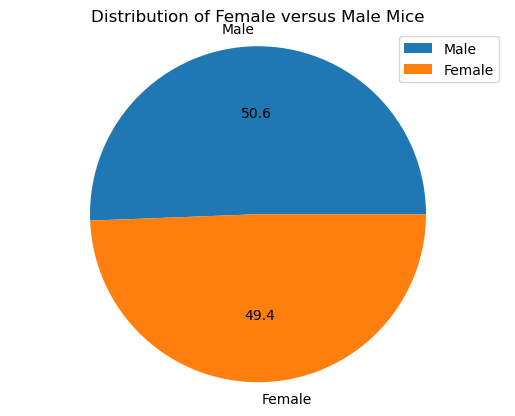

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create gender counts 
mice_gender = drop_duplicate_mice["Sex"].value_counts()
labels = list(mice_gender.index)

plt.pie(mice_gender, labels=labels, autopct="%1.1f")
plt.title("Distribution of Female versus Male Mice")
plt.legend(labels, loc="upper right")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = drop_duplicate_mice.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merge = pd.merge(last_greatest_timepoint, drop_duplicate_mice, on=(["Mouse ID", "Timepoint"]))
last_timepoint_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

for drug in treatments:
    final_tumor_volume = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_data.append(final_tumor_volume)

    quartile = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    outliers= final_tumor_volume.loc[(final_tumor_volume>upper_bound) | (final_tumor_volume<lower_bound)]  
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


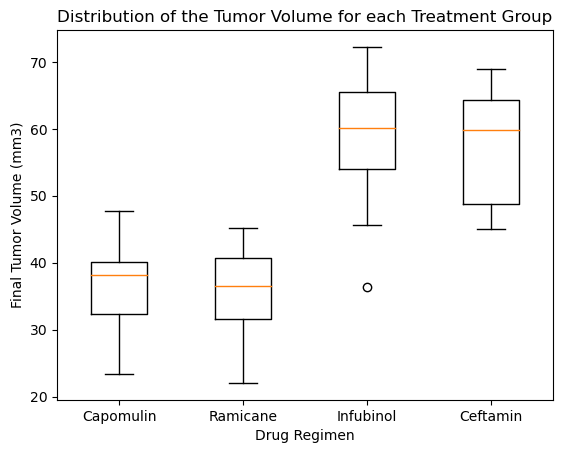

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of the Tumor Volume for each Treatment Group")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_data , labels = treatments)

plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Select mice treated with Capomulin
capomulin_list = drop_duplicate_mice.loc[drop_duplicate_mice["Drug Regimen"] == "Capomulin"]
capomulin_list.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

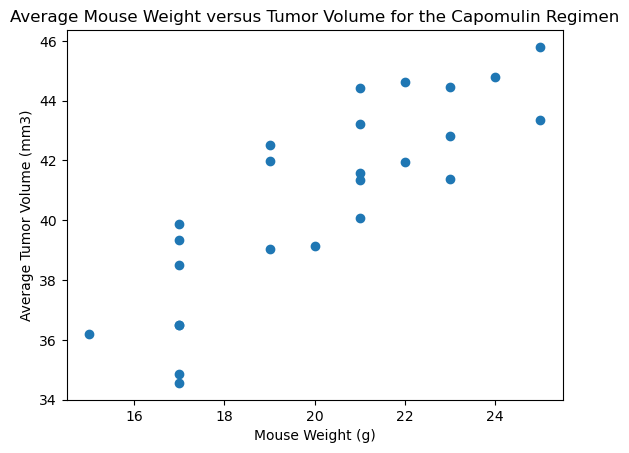

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# calculate average mouse weight and average observed tumor volume for the entire capomulin regimen
mouse_data = capomulin_list.groupby("Mouse ID")
mouse_volume = mouse_data["Tumor Volume (mm3)"].mean()
mouse_weight = mouse_data["Weight (g)"].mean()
scatter_data = pd.DataFrame({"Weight (g)": mouse_weight,
                            "Tumor Volume (mm3)": mouse_volume})

# Create Scatter Plot
x_axis = scatter_data["Weight (g)"]
y_axis = scatter_data["Tumor Volume (mm3)"]

# Create plot title, limits and labels
plt.title("Average Mouse Weight versus Tumor Volume for the Capomulin Regimen")
plt.scatter(x_axis, y_axis, marker="o")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


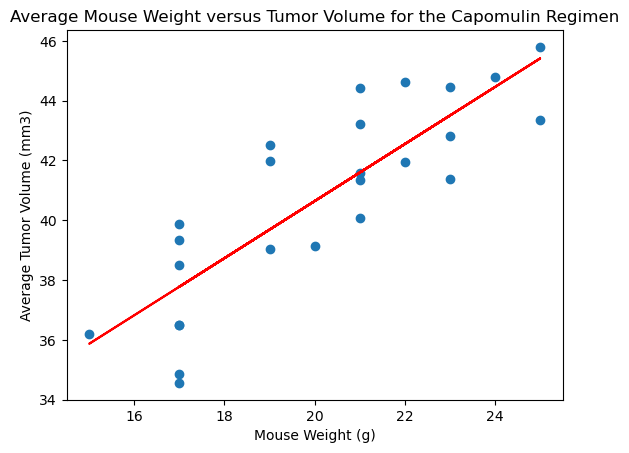

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create the x and y axes
x_axis = scatter_data["Weight (g)"]
y_axis = scatter_data["Tumor Volume (mm3)"]

# Calculate the linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept

# Create the Scatter and Line graph and compute the Pearson correlation coefficient between mouse weight and tumor volume
plt.title("Average Mouse Weight versus Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.scatter(x_axis, y_axis, marker="o")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis, regress,"r-")

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
